## Linear and Non Linear regression model for Florida State

In [2]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

### Use super dataset generated to perform analysis

In [3]:
superdataset = pd.read_csv("superdataset.csv")
superdataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0


### Filter the superdataset for Florida cases and remove statewide unallocated values

In [4]:
covid_dataset_fl = superdataset[superdataset['State'] == 'FL']
covid_dataset_fl = covid_dataset_fl[covid_dataset_fl['County_Name'] != 'statewide unallocated']
covid_dataset_fl.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
238612,12001,alachua county,FL,2020-01-22,0,0,269043
238613,12001,alachua county,FL,2020-01-23,0,0,269043
238614,12001,alachua county,FL,2020-01-24,0,0,269043
238615,12001,alachua county,FL,2020-01-25,0,0,269043
238616,12001,alachua county,FL,2020-01-26,0,0,269043


### Calculate new cases and deaths for selected state using diff() function

In [5]:
covid_dataset_fl['Num of new cases per day'] = covid_dataset_fl['Confirmed'].diff()
covid_dataset_fl['Num of death cases per day'] = covid_dataset_fl['Deaths'].diff()
covid_dataset_fl

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0
...,...,...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473,0.0,0.0
288724,12133,washington county,FL,2022-02-04,6463,52,25473,202.0,0.0
288725,12133,washington county,FL,2022-02-05,6463,52,25473,0.0,0.0
288726,12133,washington county,FL,2022-02-06,6463,52,25473,0.0,0.0


### Change the Date column data to correct format for date calculations

In [6]:
covid_dataset_fl['Date'] = covid_dataset_fl.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
covid_dataset_fl.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0


### Removing the NaN values from first row and groupby data by Date 

In [7]:
covid_dataset_fl_groupBy_Date = covid_dataset_fl.groupby("Date").sum().reset_index()
covid_dataset_fl_groupBy_Date = covid_dataset_fl_groupBy_Date.drop([0]).reset_index(drop=True)
covid_dataset_fl_groupBy_Date

,Date,countyFIPS,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
0,2020-01-23,808550,0,0,21477737,0.0,0.0
1,2020-01-24,808550,0,0,21477737,0.0,0.0
2,2020-01-25,808550,0,0,21477737,0.0,0.0
3,2020-01-26,808550,0,0,21477737,0.0,0.0
4,2020-01-27,808550,0,0,21477737,0.0,0.0
...,...,...,...,...,...,...,...
742,2022-02-03,808550,5478670,36973,21477737,0.0,0.0
743,2022-02-04,808550,5610368,36973,21477737,131698.0,0.0
744,2022-02-05,808550,5610368,36973,21477737,0.0,0.0
745,2022-02-06,808550,5610368,36973,21477737,0.0,0.0


#### Generate increamental column for Days [1]

In [8]:
#covide_dataset_fl_groupBy_Date['Days'] = covide_dataset_fl_groupBy_Date.insert(0, 'Days', covide_dataset_fl_groupBy_Date.index + 1)
covid_dataset_fl_groupBy_Date['Days'] = covid_dataset_fl_groupBy_Date.index + 1

covid_dataset_fl_groupBy_Date

,Date,countyFIPS,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day,Days
0,2020-01-23,808550,0,0,21477737,0.0,0.0,1
1,2020-01-24,808550,0,0,21477737,0.0,0.0,2
2,2020-01-25,808550,0,0,21477737,0.0,0.0,3
3,2020-01-26,808550,0,0,21477737,0.0,0.0,4
4,2020-01-27,808550,0,0,21477737,0.0,0.0,5
...,...,...,...,...,...,...,...,...
742,2022-02-03,808550,5478670,36973,21477737,0.0,0.0,743
743,2022-02-04,808550,5610368,36973,21477737,131698.0,0.0,744
744,2022-02-05,808550,5610368,36973,21477737,0.0,0.0,745
745,2022-02-06,808550,5610368,36973,21477737,0.0,0.0,746


In [9]:
covid_fl = covid_dataset_fl_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl

,Date,Num of new cases per day,Num of death cases per day,Days
0,2020-01-23,0.0,0.0,1
1,2020-01-24,0.0,0.0,2
2,2020-01-25,0.0,0.0,3
3,2020-01-26,0.0,0.0,4
4,2020-01-27,0.0,0.0,5
...,...,...,...,...
742,2022-02-03,0.0,0.0,743
743,2022-02-04,131698.0,0.0,744
744,2022-02-05,0.0,0.0,745
745,2022-02-06,0.0,0.0,746


### Linear Regression Model for New cases in FL State

#### Use Linear Regression technique from sklearn library [2]

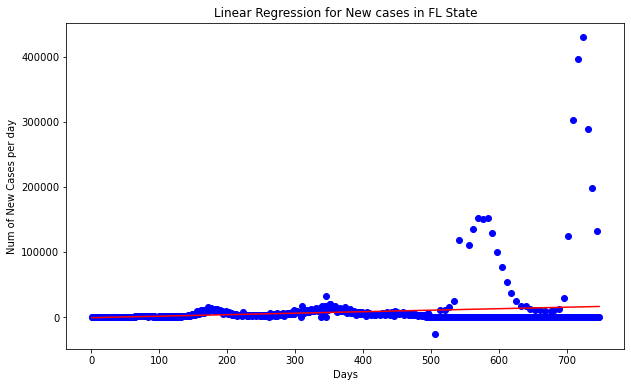

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = covid_fl[['Days']]
Y = covid_fl['Num of new cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for New cases in FL State')
plt.xlabel('Days')
plt.ylabel('Num of New Cases per day')
plt.show()

#### Calculate RMSE value error using sklearn library [3]

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = mean_squared_error(Y, y_pred)
rmse = sqrt(rms)
print ("Root Mean Squared Error (RMSE) for New cases in Florida: ", rmse)


Root Mean Squared Error (RMSE) for New cases in Florida:  30662.739554581058


### Non-Linear (polynomial) regression model for New cases in FL state

#### Code Reference for Non-Linear (polynomial) regression model [4]

In [12]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)


print('Coefficients of x are', lin_degree2.coef_)
print('Intercept is', lin_degree2.intercept_)


Coefficients of x are [-13.80919301   0.04926275]
Intercept is 3493.744276781452


In [13]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
import operator

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)


print('Coefficients of x are', lin_degree3.coef_)
print('Intercept is', lin_degree3.intercept_)

Coefficients of x are [ 1.36476730e+02 -4.52693945e-01  4.47376731e-04]
Intercept is -5905.394792559817


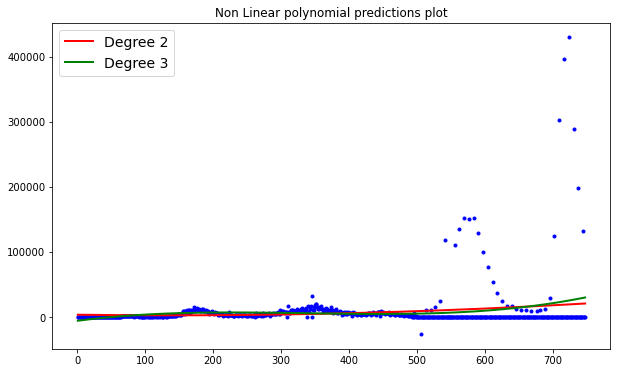

In [14]:
x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot")
plt.show()

In [15]:
rms_degree2 = mean_squared_error(Y, y_poly_pred_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Florida: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Florida:  30594.208420480318


In [16]:
rmse_degree3 = sqrt(mean_squared_error(Y, y_new_poly_degree3))
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Florida: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Florida:  30390.560450393


### Linear Regression Model for Death cases in FL State

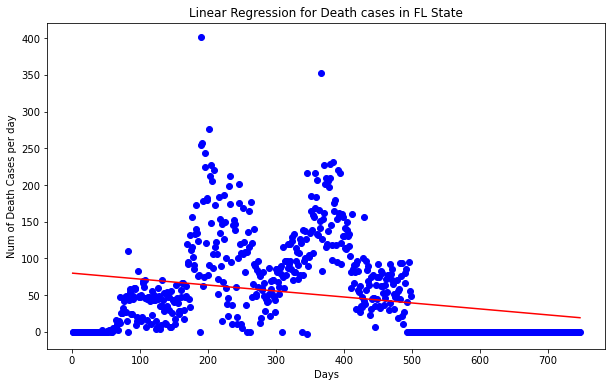

In [17]:
X = covid_fl[['Days']]
Y = covid_fl['Num of death cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for Death cases in FL State')
plt.xlabel('Days')
plt.ylabel('Num of Death Cases per day')
plt.show()

In [18]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Florida: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Florida:  59.489309086263475


### Non-Linear (polynomial) regression model for Death cases in FL state

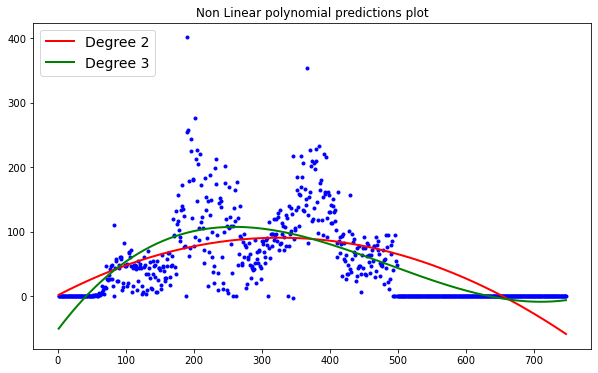

In [19]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot")
plt.show()



In [20]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Florida: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Florida:  48.134536033488466


In [21]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Florida: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Florida:  43.798774491121215


### Trend line in florida county

In [22]:
covid_fl = covid_dataset_fl_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl

,Date,Num of new cases per day,Num of death cases per day,Days
0,2020-01-23,0.0,0.0,1
1,2020-01-24,0.0,0.0,2
2,2020-01-25,0.0,0.0,3
3,2020-01-26,0.0,0.0,4
4,2020-01-27,0.0,0.0,5
...,...,...,...,...
742,2022-02-03,0.0,0.0,743
743,2022-02-04,131698.0,0.0,744
744,2022-02-05,0.0,0.0,745
745,2022-02-06,0.0,0.0,746


In [23]:
covid_dataset_fl.head(5)

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0


#### Trendline for Number of new cases per day against Days

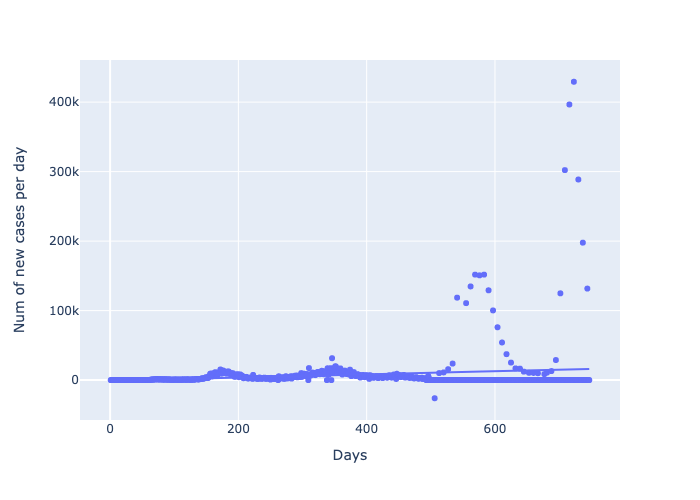

<Figure size 432x288 with 0 Axes>

In [28]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas
import plotly.express as px
from IPython.display import Image

df = covid_fl
fig = plt.figure()
fig = px.scatter(df, x="Days", y="Num of new cases per day", trendline="ols")
fig.write_image("graphs/fig1.png")
Image(filename="graphs/fig1.png")


#### Trendline for Number of death cases per day against Days

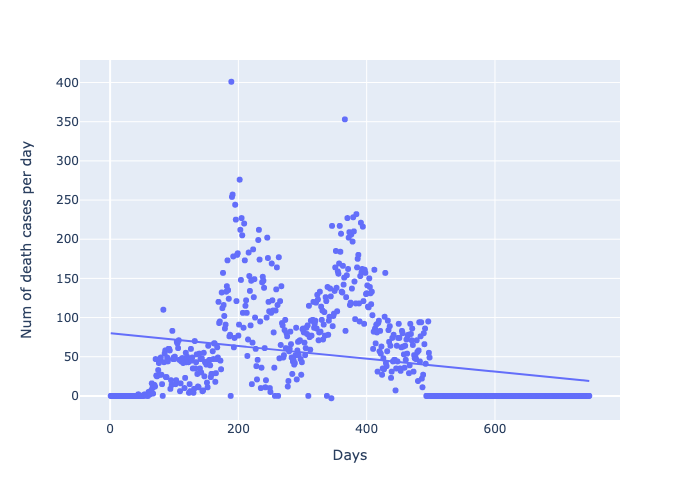

In [29]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.write_image("graphs/fig2.png")
Image(filename="graphs/fig2.png")

### Identify top 5 counties in Florida with highest number of cases

In [30]:
# use grouby date and County and sum the new cases and deaths across State
# use sort function to get highest number of cases in counties of Florida
covid_dataset_fl_groupBy_Date


,Date,countyFIPS,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day,Days
0,2020-01-23,808550,0,0,21477737,0.0,0.0,1
1,2020-01-24,808550,0,0,21477737,0.0,0.0,2
2,2020-01-25,808550,0,0,21477737,0.0,0.0,3
3,2020-01-26,808550,0,0,21477737,0.0,0.0,4
4,2020-01-27,808550,0,0,21477737,0.0,0.0,5
...,...,...,...,...,...,...,...,...
742,2022-02-03,808550,5478670,36973,21477737,0.0,0.0,743
743,2022-02-04,808550,5610368,36973,21477737,131698.0,0.0,744
744,2022-02-05,808550,5610368,36973,21477737,0.0,0.0,745
745,2022-02-06,808550,5610368,36973,21477737,0.0,0.0,746


In [31]:
covid_fl_grouBy_counties = covid_dataset_fl.groupby(["County_Name"]).sum().reset_index()
covid_fl_grouBy_counties = covid_fl_grouBy_counties.sort_values(by=['Num of new cases per day'],ascending=False)
covid_fl_grouBy_counties.head()

,County_Name,countyFIPS,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
42,miami-dade county,9040328,267660984,3049531,2032271120,1107558.0,6137.0
5,broward county,8984228,133719273,1409555,1460677944,454419.0,2165.0
47,orange county,9047060,80073845,581926,1042302096,348651.0,1221.0
27,hillsborough county,9018636,81672748,814651,1101032064,332633.0,1466.0
49,palm beach county,9050052,82345694,1366225,1119583960,244719.0,2354.0


### Top 5 counties in Florida State with highest number of cases are:
* miami-dade county
* broward county
* orange county	
* hillsborough county
* palm beach county

### 1. Miami-Dade County

In [32]:
covid_dataset_fl_mdc = covid_dataset_fl[covid_dataset_fl['County_Name'] == "miami-dade county"]
covid_dataset_fl_mdc.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
270028,12086,miami-dade county,FL,2020-01-22,0,0,2716940,-30136.0,-335.0
270029,12086,miami-dade county,FL,2020-01-23,0,0,2716940,0.0,0.0
270030,12086,miami-dade county,FL,2020-01-24,0,0,2716940,0.0,0.0
270031,12086,miami-dade county,FL,2020-01-25,0,0,2716940,0.0,0.0
270032,12086,miami-dade county,FL,2020-01-26,0,0,2716940,0.0,0.0


In [33]:
covid_dataset_fl_mdc = covid_dataset_fl_mdc.reset_index(drop=True)
covid_dataset_fl_mdc_groupBy_Date = covid_dataset_fl_mdc.drop([0])
covid_dataset_fl_mdc_groupBy_Date = covid_dataset_fl_mdc_groupBy_Date.reset_index(drop=True)
covid_dataset_fl_mdc_groupBy_Date.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
0,12086,miami-dade county,FL,2020-01-23,0,0,2716940,0.0,0.0
1,12086,miami-dade county,FL,2020-01-24,0,0,2716940,0.0,0.0
2,12086,miami-dade county,FL,2020-01-25,0,0,2716940,0.0,0.0
3,12086,miami-dade county,FL,2020-01-26,0,0,2716940,0.0,0.0
4,12086,miami-dade county,FL,2020-01-27,0,0,2716940,0.0,0.0


In [34]:
covid_fl_mdc = covid_dataset_fl_mdc_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl_mdc.head()

,County_Name,State,Date,Num of new cases per day,Num of death cases per day
0,miami-dade county,FL,2020-01-23,0.0,0.0
1,miami-dade county,FL,2020-01-24,0.0,0.0
2,miami-dade county,FL,2020-01-25,0.0,0.0
3,miami-dade county,FL,2020-01-26,0.0,0.0
4,miami-dade county,FL,2020-01-27,0.0,0.0


In [35]:
covid_fl_mdc['Days'] = covid_fl_mdc.index + 1

covid_fl_mdc

,County_Name,State,Date,Num of new cases per day,Num of death cases per day,Days
0,miami-dade county,FL,2020-01-23,0.0,0.0,1
1,miami-dade county,FL,2020-01-24,0.0,0.0,2
2,miami-dade county,FL,2020-01-25,0.0,0.0,3
3,miami-dade county,FL,2020-01-26,0.0,0.0,4
4,miami-dade county,FL,2020-01-27,0.0,0.0,5
...,...,...,...,...,...,...
742,miami-dade county,FL,2022-02-03,0.0,0.0,743
743,miami-dade county,FL,2022-02-04,16208.0,0.0,744
744,miami-dade county,FL,2022-02-05,0.0,0.0,745
745,miami-dade county,FL,2022-02-06,0.0,0.0,746


### Linear Regression Model for New cases in Miami-Dade County

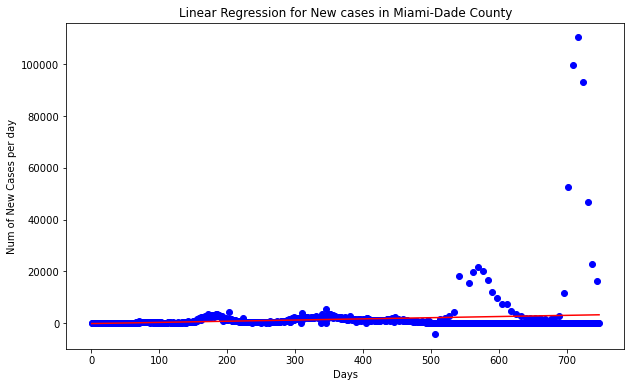

In [36]:

X = covid_fl_mdc[['Days']]
Y = covid_fl_mdc['Num of new cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for New cases in Miami-Dade County')
plt.xlabel('Days')
plt.ylabel('Num of New Cases per day')
plt.show()

In [37]:
rms = mean_squared_error(Y, y_pred)
rmse = sqrt(rms)
print ("Root Mean Squared Error (RMSE) for New cases in Miami Dade Count: ", rmse)


Root Mean Squared Error (RMSE) for New cases in Miami Dade Count:  7116.607571363942


### Non Linear Regression Model for New cases in Miami-Dade County

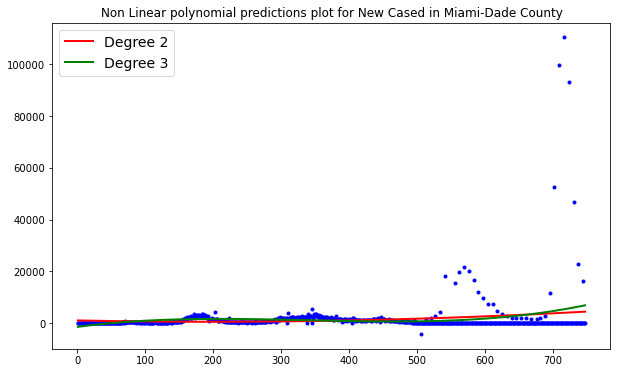

In [38]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for New Cased in Miami-Dade County")
plt.show()

In [39]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Miami_datde county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Miami_datde county:  7096.08967100484


In [40]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Miami_datde county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Miami_datde county:  7033.796168549499


### Linear Regression Model for death cases in Miami-Dade County

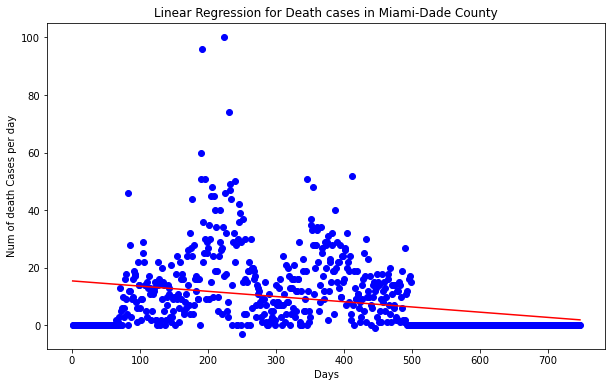

In [41]:
X = covid_fl_mdc[['Days']]
Y = covid_fl_mdc['Num of death cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for Death cases in Miami-Dade County')
plt.xlabel('Days')
plt.ylabel('Num of death Cases per day')
plt.show()

In [42]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Miami-Dade County: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Miami-Dade County:  11.917195946145105


### Non Linear Regression Model for death cases in Miami-Dade County

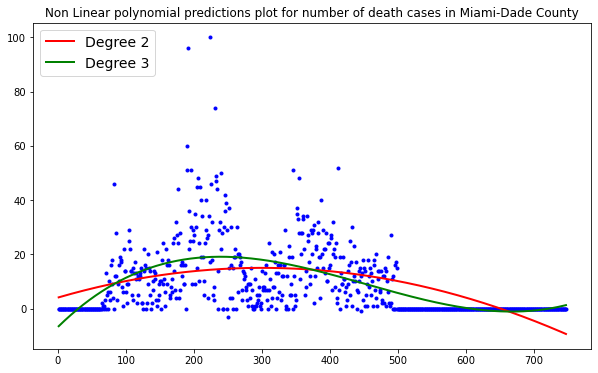

In [43]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for number of death cases in Miami-Dade County")
plt.show()

In [44]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Miami-Dade County: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Miami-Dade County:  10.784560447766802


In [45]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Miami-Dade County: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Miami-Dade County:  9.992827975239456


#### Trendline for Number of New cases in Miami-Dade County

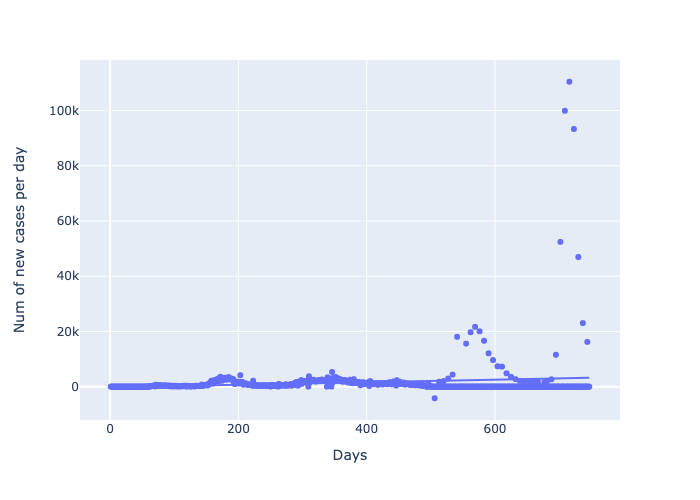

In [46]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_mdc
fig = px.scatter(df, x="Days", y="Num of new cases per day", trendline="ols")
fig.write_image("graphs/fig3.png")
Image(filename="graphs/fig3.png")

#### Trendline for Number of Death cases in Miami-Dade County

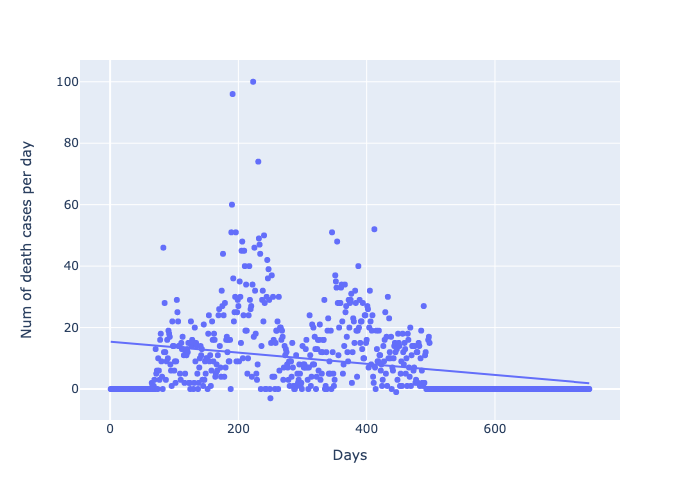

In [47]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_mdc
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.write_image("graphs/fig4.png")
Image(filename="graphs/fig4.png")

### 2. Broward county

In [48]:
covid_dataset_fl_brc = covid_dataset_fl[covid_dataset_fl['County_Name'] == "broward county"]
covid_dataset_fl_brc.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
242352,12011,broward county,FL,2020-01-22,0,0,1952778,-126687.0,-914.0
242353,12011,broward county,FL,2020-01-23,0,0,1952778,0.0,0.0
242354,12011,broward county,FL,2020-01-24,0,0,1952778,0.0,0.0
242355,12011,broward county,FL,2020-01-25,0,0,1952778,0.0,0.0
242356,12011,broward county,FL,2020-01-26,0,0,1952778,0.0,0.0


In [49]:
covid_dataset_fl_brc = covid_dataset_fl_brc.reset_index(drop=True)
covid_dataset_fl_brc_groupBy_Date = covid_dataset_fl_brc.drop([0])
covid_dataset_fl_brc_groupBy_Date = covid_dataset_fl_brc_groupBy_Date.reset_index(drop=True)
covid_dataset_fl_brc_groupBy_Date.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
0,12011,broward county,FL,2020-01-23,0,0,1952778,0.0,0.0
1,12011,broward county,FL,2020-01-24,0,0,1952778,0.0,0.0
2,12011,broward county,FL,2020-01-25,0,0,1952778,0.0,0.0
3,12011,broward county,FL,2020-01-26,0,0,1952778,0.0,0.0
4,12011,broward county,FL,2020-01-27,0,0,1952778,0.0,0.0


In [50]:
covid_fl_brc = covid_dataset_fl_brc_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl_brc.head()

,County_Name,State,Date,Num of new cases per day,Num of death cases per day
0,broward county,FL,2020-01-23,0.0,0.0
1,broward county,FL,2020-01-24,0.0,0.0
2,broward county,FL,2020-01-25,0.0,0.0
3,broward county,FL,2020-01-26,0.0,0.0
4,broward county,FL,2020-01-27,0.0,0.0


In [51]:
covid_fl_brc['Days'] = covid_fl_brc.index + 1
covid_fl_brc

,County_Name,State,Date,Num of new cases per day,Num of death cases per day,Days
0,broward county,FL,2020-01-23,0.0,0.0,1
1,broward county,FL,2020-01-24,0.0,0.0,2
2,broward county,FL,2020-01-25,0.0,0.0,3
3,broward county,FL,2020-01-26,0.0,0.0,4
4,broward county,FL,2020-01-27,0.0,0.0,5
...,...,...,...,...,...,...
742,broward county,FL,2022-02-03,0.0,0.0,743
743,broward county,FL,2022-02-04,7794.0,0.0,744
744,broward county,FL,2022-02-05,0.0,0.0,745
745,broward county,FL,2022-02-06,0.0,0.0,746


### Linear Regression Model for New cases in Broward County

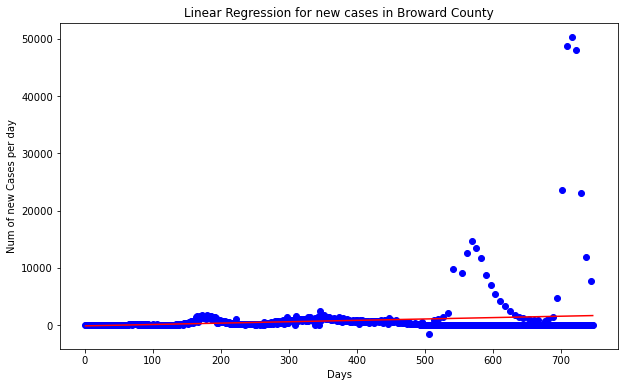

In [52]:
X = covid_fl_brc[['Days']]
Y = covid_fl_brc['Num of new cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for new cases in Broward County')
plt.xlabel('Days')
plt.ylabel('Num of new Cases per day')
plt.show()

In [53]:
rms = mean_squared_error(Y, y_pred)
rmse = sqrt(rms)
print ("Root Mean Squared Error (RMSE) for New cases in Broward County: ", rmse)


Root Mean Squared Error (RMSE) for New cases in Broward County:  3505.9916258571375


### Non Linear Regression Model for New cases in Broward County

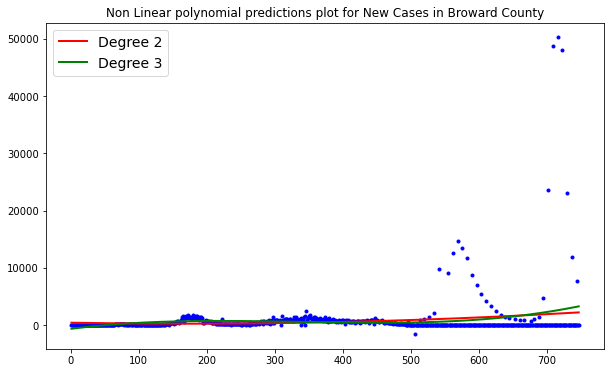

In [54]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for New Cases in Broward County")
plt.show()

In [55]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Broward county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 New cases in Broward county:  3497.189402134046


In [56]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Broward county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Broward county:  3473.9722467776614


### Linear Regression Model for death cases in Broward County

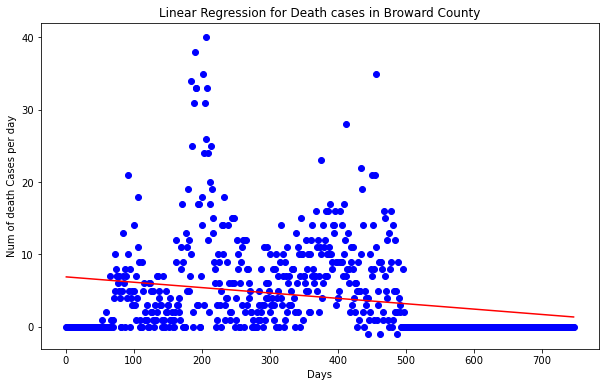

In [57]:
X = covid_fl_brc[['Days']]
Y = covid_fl_brc['Num of death cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for Death cases in Broward County')
plt.xlabel('Days')
plt.ylabel('Num of death Cases per day')
plt.show()

In [58]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Broward county: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Broward county:  6.120990909682351


### Non Linear Regression Model for death cases in Broward County

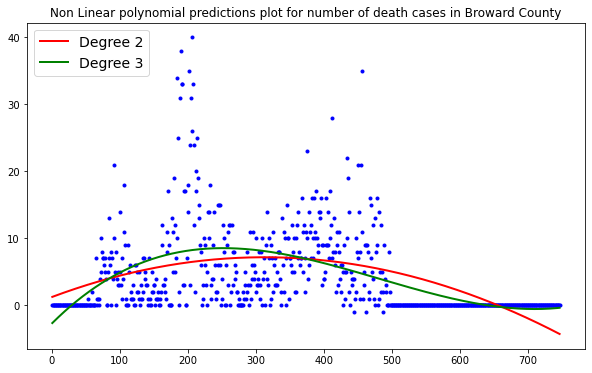

In [59]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for number of death cases in Broward County")
plt.show()

In [60]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Broward county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Broward county:  5.573957009070015


In [61]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Broward county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Broward county:  5.371288967045542


#### Trendline for Number of new cases in Broward County

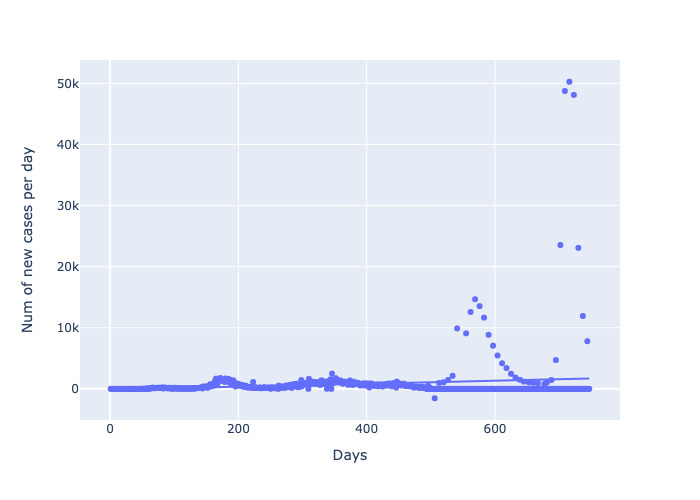

In [62]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_brc
fig = px.scatter(df, x="Days", y="Num of new cases per day", trendline="ols")
fig.write_image("graphs/fig5.png")
Image(filename="graphs/fig5.png")

#### Trendline for Number of death cases in Broward County

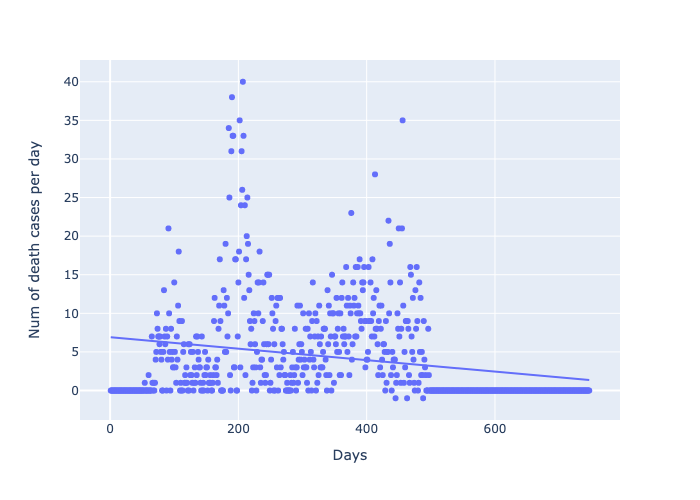

In [63]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_brc
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.write_image("graphs/fig6.png")
Image(filename="graphs/fig6.png")

### 3. Orange county

In [64]:
covid_dataset_fl_orc = covid_dataset_fl[covid_dataset_fl['County_Name'] == "orange county"]
covid_dataset_fl_orc.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
273768,12095,orange county,FL,2020-01-22,0,0,1393452,-10310.0,-89.0
273769,12095,orange county,FL,2020-01-23,0,0,1393452,0.0,0.0
273770,12095,orange county,FL,2020-01-24,0,0,1393452,0.0,0.0
273771,12095,orange county,FL,2020-01-25,0,0,1393452,0.0,0.0
273772,12095,orange county,FL,2020-01-26,0,0,1393452,0.0,0.0


In [65]:
covid_dataset_fl_orc = covid_dataset_fl_orc.reset_index(drop=True)
covid_dataset_fl_orc_groupBy_Date = covid_dataset_fl_orc.drop([0])
covid_dataset_fl_orc_groupBy_Date = covid_dataset_fl_orc_groupBy_Date.reset_index(drop=True)
covid_dataset_fl_orc_groupBy_Date.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
0,12095,orange county,FL,2020-01-23,0,0,1393452,0.0,0.0
1,12095,orange county,FL,2020-01-24,0,0,1393452,0.0,0.0
2,12095,orange county,FL,2020-01-25,0,0,1393452,0.0,0.0
3,12095,orange county,FL,2020-01-26,0,0,1393452,0.0,0.0
4,12095,orange county,FL,2020-01-27,0,0,1393452,0.0,0.0


In [66]:
covid_fl_orc = covid_dataset_fl_orc_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl_orc.head()

,County_Name,State,Date,Num of new cases per day,Num of death cases per day
0,orange county,FL,2020-01-23,0.0,0.0
1,orange county,FL,2020-01-24,0.0,0.0
2,orange county,FL,2020-01-25,0.0,0.0
3,orange county,FL,2020-01-26,0.0,0.0
4,orange county,FL,2020-01-27,0.0,0.0


In [67]:
covid_fl_orc['Days'] = covid_fl_orc.index + 1

covid_fl_orc

,County_Name,State,Date,Num of new cases per day,Num of death cases per day,Days
0,orange county,FL,2020-01-23,0.0,0.0,1
1,orange county,FL,2020-01-24,0.0,0.0,2
2,orange county,FL,2020-01-25,0.0,0.0,3
3,orange county,FL,2020-01-26,0.0,0.0,4
4,orange county,FL,2020-01-27,0.0,0.0,5
...,...,...,...,...,...,...
742,orange county,FL,2022-02-03,0.0,0.0,743
743,orange county,FL,2022-02-04,7975.0,0.0,744
744,orange county,FL,2022-02-05,0.0,0.0,745
745,orange county,FL,2022-02-06,0.0,0.0,746


### Linear Regression Model for New cases in Orange County

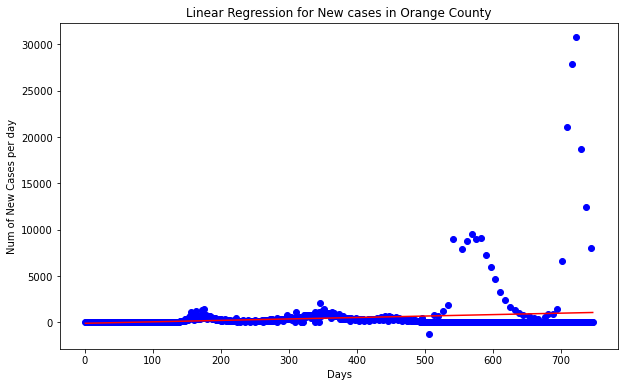

In [68]:
X = covid_fl_orc[['Days']]
Y = covid_fl_orc['Num of new cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for New cases in Orange County')
plt.xlabel('Days')
plt.ylabel('Num of New Cases per day')
plt.show()

In [69]:
rms = mean_squared_error(Y, y_pred)
rmse = sqrt(rms)
print ("Root Mean Squared Error (RMSE) for New cases in Orange County: ", rmse)

Root Mean Squared Error (RMSE) for New cases in Orange County:  2079.859423978348


### Non Linear Regression Model for New cases in Orange County

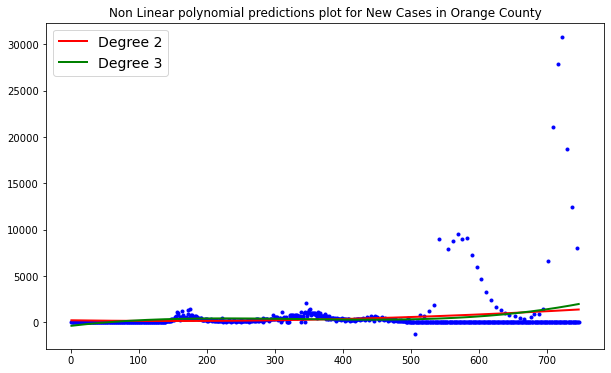

In [70]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for New Cases in Orange County")
plt.show()

In [71]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Orange county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Orange county:  2074.79941861218


In [72]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Orange county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Orange county:  2062.4830283695715


### Linear Regression Model for Death cases in Orange County


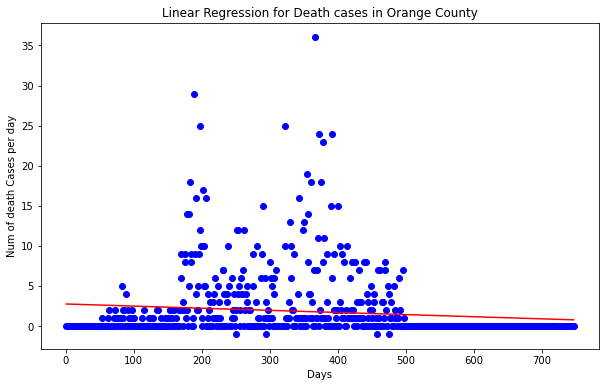

In [73]:
X = covid_fl_orc[['Days']]
Y = covid_fl_orc['Num of death cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for Death cases in Orange County')
plt.xlabel('Days')
plt.ylabel('Num of death Cases per day')
plt.show()

In [74]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Orange county: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Orange county:  3.998507921637369


In [75]:
### Non Linear Regression Model for Death cases in Orange County


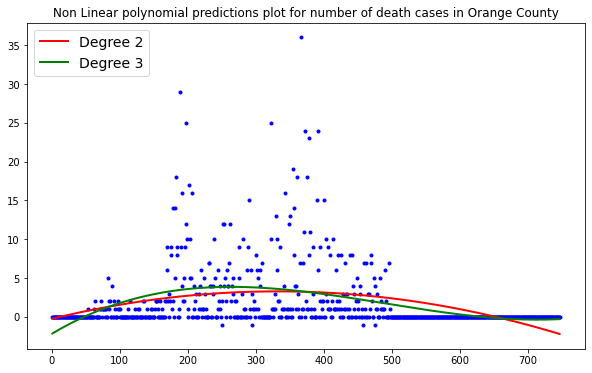

In [76]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for number of death cases in Orange County")
plt.show()

In [77]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Orange county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Orange county:  3.771039764946744


In [78]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Orange county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Orange county:  3.699808479554459


#### Trendline of Number of new cases in Orange County

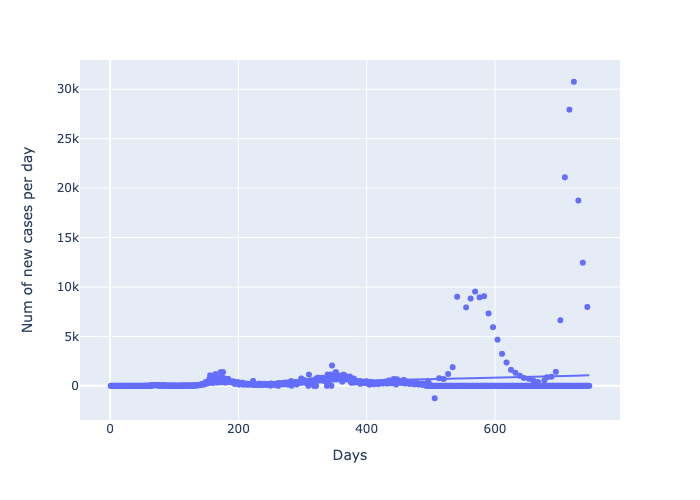

In [80]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_orc
fig = px.scatter(df, x="Days", y="Num of new cases per day", trendline="ols")
fig.write_image("graphs/fig7.png")
Image(filename="graphs/fig7.png")

#### Trendline of Number of death cases in Orange County

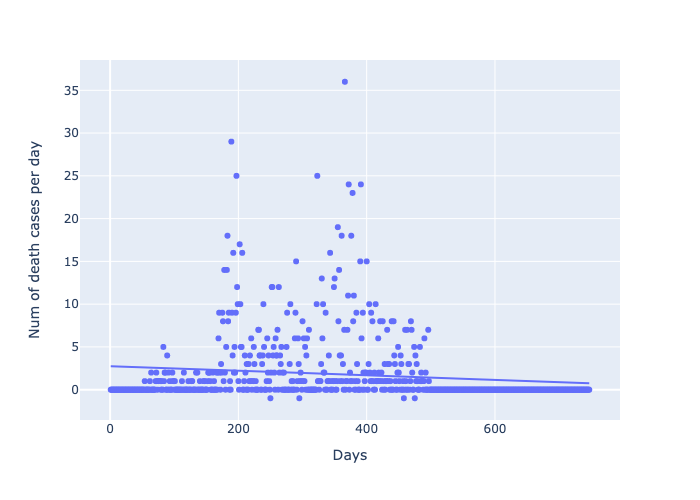

In [81]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_orc
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.write_image("graphs/fig8.png")
Image(filename="graphs/fig8.png")

### 4. Hillsborough county


In [82]:
covid_dataset_fl_hbc = covid_dataset_fl[covid_dataset_fl['County_Name'] == "hillsborough county"]
covid_dataset_fl_hbc.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
258808,12057,hillsborough county,FL,2020-01-22,0,0,1471968,-22714.0,-366.0
258809,12057,hillsborough county,FL,2020-01-23,0,0,1471968,0.0,0.0
258810,12057,hillsborough county,FL,2020-01-24,0,0,1471968,0.0,0.0
258811,12057,hillsborough county,FL,2020-01-25,0,0,1471968,0.0,0.0
258812,12057,hillsborough county,FL,2020-01-26,0,0,1471968,0.0,0.0


In [83]:
covid_dataset_fl_hbc = covid_dataset_fl_hbc.reset_index(drop=True)
covid_dataset_fl_hbc_groupBy_Date = covid_dataset_fl_hbc.drop([0])
covid_dataset_fl_hbc_groupBy_Date = covid_dataset_fl_hbc_groupBy_Date.reset_index(drop=True)
covid_dataset_fl_hbc_groupBy_Date.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
0,12057,hillsborough county,FL,2020-01-23,0,0,1471968,0.0,0.0
1,12057,hillsborough county,FL,2020-01-24,0,0,1471968,0.0,0.0
2,12057,hillsborough county,FL,2020-01-25,0,0,1471968,0.0,0.0
3,12057,hillsborough county,FL,2020-01-26,0,0,1471968,0.0,0.0
4,12057,hillsborough county,FL,2020-01-27,0,0,1471968,0.0,0.0


In [84]:
covid_fl_hbc = covid_dataset_fl_hbc_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl_hbc.head()

,County_Name,State,Date,Num of new cases per day,Num of death cases per day
0,hillsborough county,FL,2020-01-23,0.0,0.0
1,hillsborough county,FL,2020-01-24,0.0,0.0
2,hillsborough county,FL,2020-01-25,0.0,0.0
3,hillsborough county,FL,2020-01-26,0.0,0.0
4,hillsborough county,FL,2020-01-27,0.0,0.0


In [85]:
covid_fl_hbc['Days'] = covid_fl_hbc.index + 1
covid_fl_hbc

,County_Name,State,Date,Num of new cases per day,Num of death cases per day,Days
0,hillsborough county,FL,2020-01-23,0.0,0.0,1
1,hillsborough county,FL,2020-01-24,0.0,0.0,2
2,hillsborough county,FL,2020-01-25,0.0,0.0,3
3,hillsborough county,FL,2020-01-26,0.0,0.0,4
4,hillsborough county,FL,2020-01-27,0.0,0.0,5
...,...,...,...,...,...,...
742,hillsborough county,FL,2022-02-03,0.0,0.0,743
743,hillsborough county,FL,2022-02-04,8569.0,0.0,744
744,hillsborough county,FL,2022-02-05,0.0,0.0,745
745,hillsborough county,FL,2022-02-06,0.0,0.0,746


### Linear Regression Model for New cases in Hillsborough County

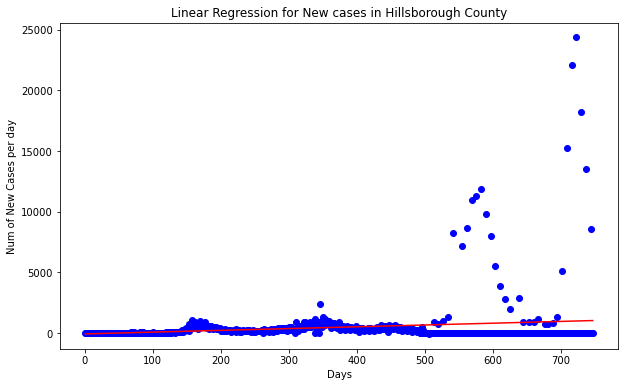

In [86]:
X = covid_fl_hbc[['Days']]
Y = covid_fl_hbc['Num of new cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for New cases in Hillsborough County')
plt.xlabel('Days')
plt.ylabel('Num of New Cases per day')
plt.show()

In [87]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Hillsborough county: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Hillsborough county:  1860.435310673409


### Non Linear Regression Model for New cases in Hillsborough County

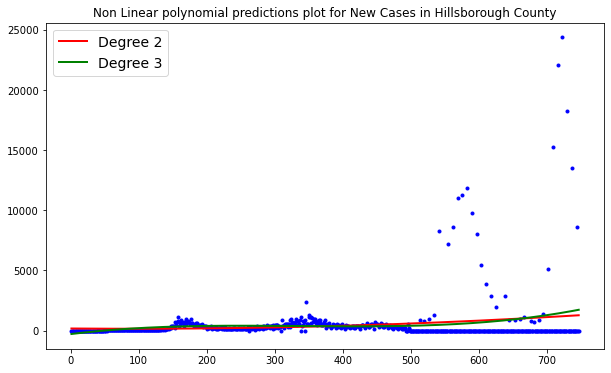

In [88]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for New Cases in Hillsborough County")
plt.show()

In [89]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Hillsborough county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Hillsborough county:  1857.2648152051179


In [90]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Hillsborough county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Hillsborough county:  1849.1322248963843


###  Linear Regression Model for Death cases in Hillsborough County

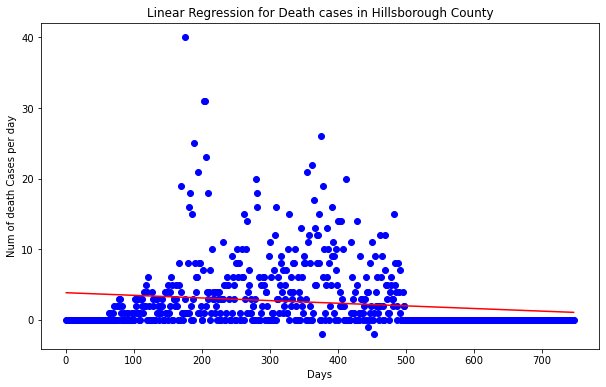

In [91]:
X = covid_fl_hbc[['Days']]
Y = covid_fl_hbc['Num of death cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for Death cases in Hillsborough County')
plt.xlabel('Days')
plt.ylabel('Num of death Cases per day')
plt.show()

In [92]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Hillsborough county: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Hillsborough county:  4.5941581568424015


### Non Linear Regression Model for Death cases in Hillsborough County


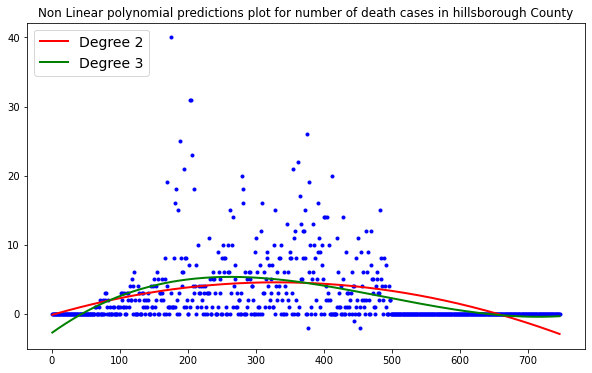

In [93]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for number of death cases in hillsborough County")
plt.show()

In [94]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in hillsborough county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in hillsborough county:  4.228601668881317


In [95]:
ms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Hillsborough county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in Hillsborough county:  1849.1322248963843


#### Trendline of Number of new cases in Hillsborough county

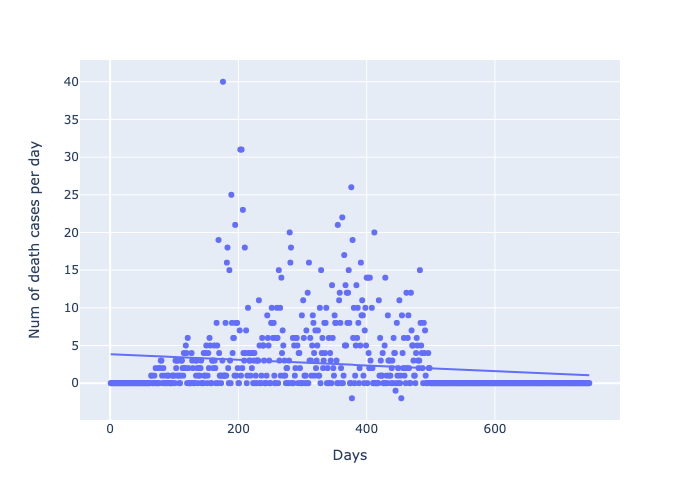

In [96]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_hbc
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.write_image("graphs/fig9.png")
Image(filename="graphs/fig9.png")

#### Trendline of Number of death cases in Hillsborough county

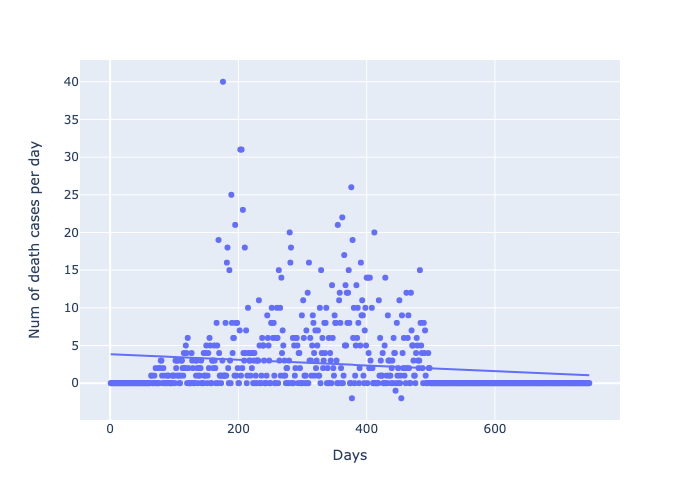

In [97]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_hbc
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.write_image("graphs/fig10.png")
Image(filename="graphs/fig10.png")

### 5. Palm beach county

In [98]:
covid_dataset_fl_pbc = covid_dataset_fl[covid_dataset_fl['County_Name'] == "palm beach county"]
covid_dataset_fl_pbc.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
275264,12099,palm beach county,FL,2020-01-22,0,0,1496770,-109080.0,-529.0
275265,12099,palm beach county,FL,2020-01-23,0,0,1496770,0.0,0.0
275266,12099,palm beach county,FL,2020-01-24,0,0,1496770,0.0,0.0
275267,12099,palm beach county,FL,2020-01-25,0,0,1496770,0.0,0.0
275268,12099,palm beach county,FL,2020-01-26,0,0,1496770,0.0,0.0


In [99]:
covid_dataset_fl_pbc = covid_dataset_fl_pbc.reset_index(drop=True)
covid_dataset_fl_pbc_groupBy_Date = covid_dataset_fl_pbc.drop([0])
covid_dataset_fl_pbc_groupBy_Date = covid_dataset_fl_pbc_groupBy_Date.reset_index(drop=True)
covid_dataset_fl_pbc_groupBy_Date.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
0,12099,palm beach county,FL,2020-01-23,0,0,1496770,0.0,0.0
1,12099,palm beach county,FL,2020-01-24,0,0,1496770,0.0,0.0
2,12099,palm beach county,FL,2020-01-25,0,0,1496770,0.0,0.0
3,12099,palm beach county,FL,2020-01-26,0,0,1496770,0.0,0.0
4,12099,palm beach county,FL,2020-01-27,0,0,1496770,0.0,0.0


In [100]:
covid_fl_pbc = covid_dataset_fl_pbc_groupBy_Date.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
covid_fl_pbc.head()

,County_Name,State,Date,Num of new cases per day,Num of death cases per day
0,palm beach county,FL,2020-01-23,0.0,0.0
1,palm beach county,FL,2020-01-24,0.0,0.0
2,palm beach county,FL,2020-01-25,0.0,0.0
3,palm beach county,FL,2020-01-26,0.0,0.0
4,palm beach county,FL,2020-01-27,0.0,0.0


In [101]:
covid_fl_pbc['Days'] = covid_fl_pbc.index + 1
covid_fl_pbc

,County_Name,State,Date,Num of new cases per day,Num of death cases per day,Days
0,palm beach county,FL,2020-01-23,0.0,0.0,1
1,palm beach county,FL,2020-01-24,0.0,0.0,2
2,palm beach county,FL,2020-01-25,0.0,0.0,3
3,palm beach county,FL,2020-01-26,0.0,0.0,4
4,palm beach county,FL,2020-01-27,0.0,0.0,5
...,...,...,...,...,...,...
742,palm beach county,FL,2022-02-03,0.0,0.0,743
743,palm beach county,FL,2022-02-04,5758.0,0.0,744
744,palm beach county,FL,2022-02-05,0.0,0.0,745
745,palm beach county,FL,2022-02-06,0.0,0.0,746


### Linear Regression Model for New cases in palm beach county

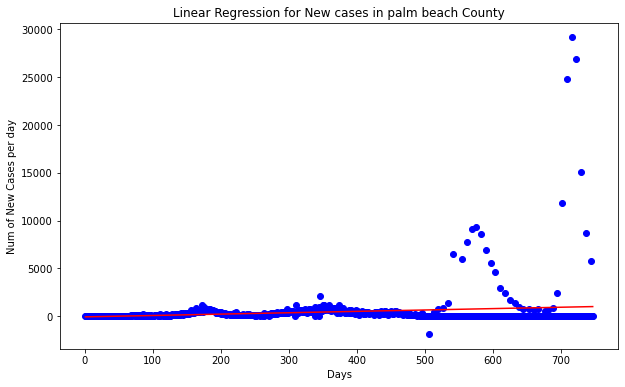

In [102]:
X = covid_fl_pbc[['Days']]
Y = covid_fl_pbc['Num of new cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for New cases in palm beach County')
plt.xlabel('Days')
plt.ylabel('Num of New Cases per day')
plt.show()

In [103]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Palm beach county: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Palm beach county:  2010.5093484232377


### Non Linear Regression Model for New cases in palm beach county

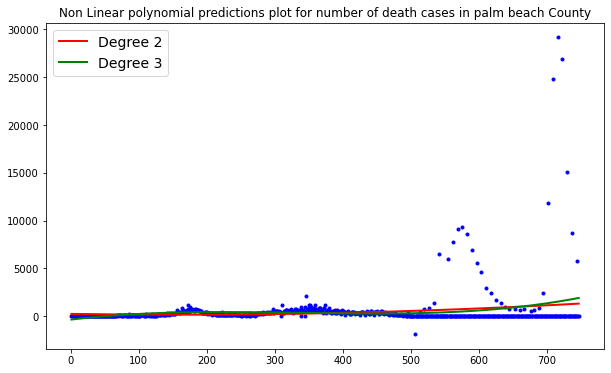

In [104]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for number of death cases in palm beach County")
plt.show()

In [105]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Palm beach county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in Palm beach county:  2005.6791040219543


In [106]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Palm beach county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 New cases in Palm beach county:  1993.0554527459929


In [107]:
### Linear Regression Model for Death cases in palm beach county

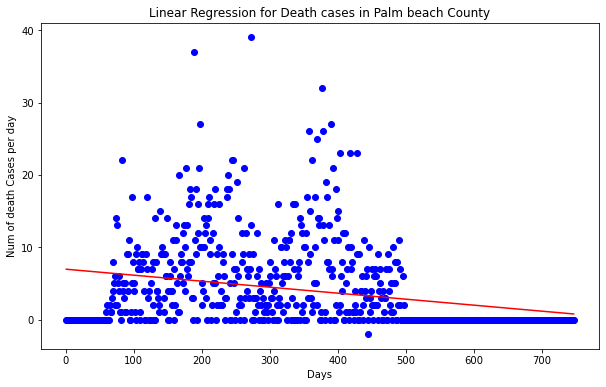

In [108]:
X = covid_fl_pbc[['Days']]
Y = covid_fl_pbc['Num of death cases per day']

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred,color='red')
plt.title('Linear Regression for Death cases in Palm beach County')
plt.xlabel('Days')
plt.ylabel('Num of death Cases per day')
plt.show()

In [109]:
predictor = model.predict(X)
rmse = sqrt(mean_squared_error(Y, predictor))
print ("Root Mean Squared Error (RMSE) for Death cases in Palm beach county: ", rmse)

Root Mean Squared Error (RMSE) for Death cases in Palm beach county:  5.615607792959163


In [110]:
### Non Linear Regression Model for Death cases in palm beach county

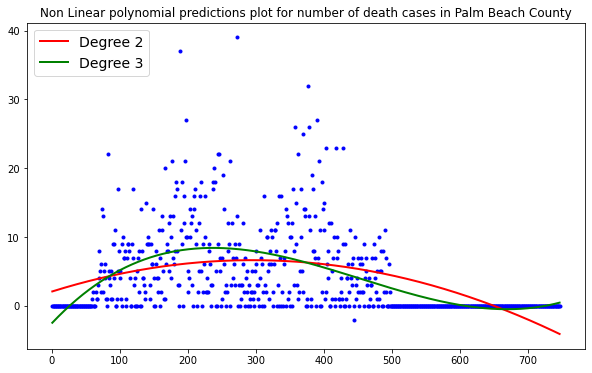

In [111]:
poly_features_degree2 = PolynomialFeatures(degree = 2, include_bias = False)
X_poly_degree2 = poly_features_degree2.fit_transform(X)

lin_degree2 = LinearRegression()
lin_degree2.fit(X_poly_degree2, Y)
y_poly_pred_degree2 = lin_degree2.predict(X_poly_degree2)

poly_features_degree3 = PolynomialFeatures(degree = 3, include_bias = False)
X_poly_degree3 = poly_features_degree3.fit_transform(X)

lin_degree3 = LinearRegression()
lin_degree3.fit(X_poly_degree3, Y)
y_poly_pred_3 = lin_degree3.predict(X_poly_degree3)

x_new = X
x_new_poly_degree2 = poly_features_degree2.transform(x_new)
y_new_degree2 = lin_degree2.predict(x_new_poly_degree2)

x_new_poly_degree3 = poly_features_degree3.transform(x_new)
y_new_poly_degree3 = lin_degree3.predict(x_new_poly_degree3)



plt.figure(figsize=(10,6))
plt.plot(X, Y, "b.")
plt.plot(x_new, y_new_degree2, "r-", linewidth = 2, label ="Degree 2")
plt.plot(x_new, y_new_poly_degree3, "g-", linewidth = 2, label ="Degree 3")
plt.legend(loc ="upper left", fontsize = 14)
  
plt.title("Non Linear polynomial predictions plot for number of death cases in Palm Beach County")
plt.show()

In [112]:
rms_degree2 = mean_squared_error(Y, y_new_degree2)
rmse_degree2 = sqrt(rms_degree2)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in palm beach county: ", rmse_degree2)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 2 Death cases in palm beach county:  5.173057712200632


In [113]:
rms_degree3 = mean_squared_error(Y, y_new_poly_degree3)
rmse_degree3 = sqrt(rms_degree3)
print ("Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in palm beach county: ", rmse_degree3)

Root Mean Squared Error (RMSE) for Non Linear Regression - Degree 3 Death cases in palm beach county:  4.873410863146238


#### Trendline of Number of new cases in palm beach county.

In [111]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_pbc
fig = px.scatter(df, x="Days", y="Num of new cases per day", trendline="ols")
fig.show()

In [112]:
#### Trendline of Number of death cases in palm beach county.

In [113]:
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas

df = covid_fl_pbc
fig = px.scatter(df, x="Days", y="Num of death cases per day", trendline="ols")
fig.show()

#### Trendline comparison of Florida state and its five counties with highest cases is same. The new cases count shows incline towards 2022 whereas the death case count declines after vaccination and social distancing norms. 

### Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.

#### Hospital dataset gives stateswise information of number of beds available for patients and number of beds used by regular patients and covid patients. 

In [111]:
hospital_dataset = pd.read_csv('hospital_dataset_new.csv')
hospital_dataset.head()

,State,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
0,OR,5,49,7093,5614,1117,184,163,1082,979,776,0.791485,0.202906,0.161067,0.245007,0.793814,2/9/2022,14
1,PA,7,79,29586,24015,2883,470,439,2798,2495,3600,0.811701,0.121272,0.098601,0.134401,0.759722,2/9/2022,39
2,PR,0,8,8938,5482,229,54,42,213,194,664,0.608078,0.042652,0.025374,0.082019,0.740964,2/9/2022,0
3,RI,1,1,2337,1946,130,24,23,126,122,139,0.832691,0.066804,0.055627,0.172662,0.848921,2/9/2022,0
4,SC,22,60,11712,9208,1440,280,278,1411,1374,1323,0.786202,0.158364,0.124665,0.218409,0.769463,2/9/2022,15


#### Merge hospital dataset with covid dataset with statewise data

In [112]:
hospital_covid_merged_dataset = pd.merge(superdataset, hospital_dataset, on='State')
hospital_covid_merged_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
0,0,statewide unallocated,AL,2020-01-22,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0,8,15066,...,1839,1662,1574,0.748507,0.171831,0.129121,0.282855,0.895172,2/9/2022,28


#### Filter the merged dataset for Florida state and remove statewide unallocated values

In [113]:
hospital_covid_merged_dataset_fl = hospital_covid_merged_dataset[hospital_covid_merged_dataset['State'] == 'FL']
hospital_covid_merged_dataset_fl = hospital_covid_merged_dataset_fl[hospital_covid_merged_dataset_fl['County_Name'] != 'statewide unallocated']
hospital_covid_merged_dataset_fl.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,inpatient_beds,...,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_covid,total_staffed_adult_icu_beds,inpatient_beds_utilization,percent_of_inpatients_with_covid,inpatient_bed_covid_utilization,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,reporting_cutoff_start,deaths_covid
238612,12001,alachua county,FL,2020-01-22,0,0,269043,7,182,57605,...,5359,5024,6295,0.786407,0.123391,0.097078,0.144698,0.792375,2/9/2022,45
238613,12001,alachua county,FL,2020-01-23,0,0,269043,7,182,57605,...,5359,5024,6295,0.786407,0.123391,0.097078,0.144698,0.792375,2/9/2022,45
238614,12001,alachua county,FL,2020-01-24,0,0,269043,7,182,57605,...,5359,5024,6295,0.786407,0.123391,0.097078,0.144698,0.792375,2/9/2022,45
238615,12001,alachua county,FL,2020-01-25,0,0,269043,7,182,57605,...,5359,5024,6295,0.786407,0.123391,0.097078,0.144698,0.792375,2/9/2022,45
238616,12001,alachua county,FL,2020-01-26,0,0,269043,7,182,57605,...,5359,5024,6295,0.786407,0.123391,0.097078,0.144698,0.792375,2/9/2022,45


In [114]:
total_beds_available = hospital_covid_merged_dataset_fl['inpatient_beds'].mean()
total_beds_available

57605.0

In [115]:
total_beds_utilized = hospital_covid_merged_dataset_fl['inpatient_beds_used'].mean()
total_beds_utilized

45301.0

In [116]:
total_beds_used_covid = hospital_covid_merged_dataset_fl['inpatient_beds_used_covid'].mean()
total_beds_used_covid

5502.0

In [117]:
percent_occupancy_fl = (total_beds_utilized/total_beds_available)*100
percent_occupancy_fl

78.64074299105981

In [118]:
percent_utilization_covid_fl = (total_beds_used_covid/total_beds_utilized)*100
percent_utilization_covid_fl

12.145427253261518

#### Plot graph of number of new cases in florida with number of beds available and number of beds utlized.  

#### Reference [5] Plot the axislines using matplotlib

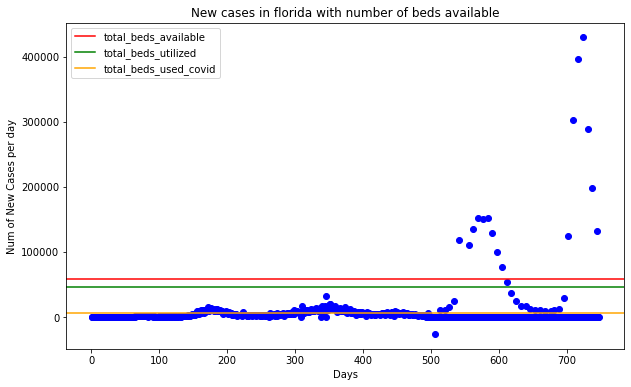

In [119]:

X = covid_fl[['Days']]
Y = covid_fl['Num of new cases per day']

plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.axhline(y=total_beds_available,color='red',label="total_beds_available")
plt.axhline(y=total_beds_utilized,color='green',label="total_beds_utilized")
plt.axhline(y=total_beds_used_covid,color='orange',label="total_beds_used_covid")
plt.title('New cases in florida with number of beds available')
plt.xlabel('Days')
plt.ylabel('Num of New Cases per day')
plt.legend()
plt.show()

#### Plot graph of number of death cases in florida with number of beds available and number of beds utlized.

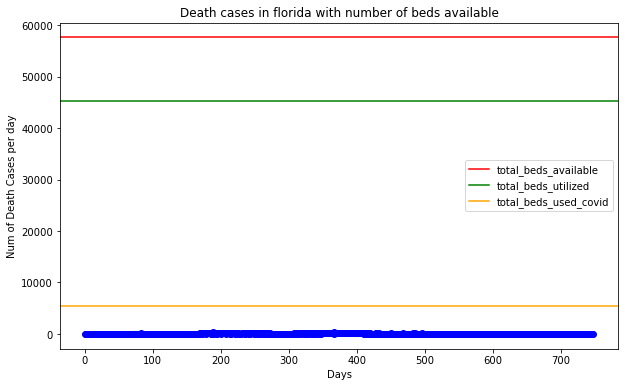

In [120]:
X = covid_fl[['Days']]
Y = covid_fl['Num of death cases per day']

plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue')
plt.axhline(y=total_beds_available,color='red',label="total_beds_available")
plt.axhline(y=total_beds_utilized,color='green',label="total_beds_utilized")
plt.axhline(y=total_beds_used_covid,color='orange',label="total_beds_used_covid")
plt.title('Death cases in florida with number of beds available')
plt.xlabel('Days')
plt.ylabel('Num of Death Cases per day')
plt.legend()
plt.show()


### Hypothesis Testing

### Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases

#### Null Hypothesis(H0) - Higher employment data lead to higher covid cases.

#### Alternate Hypothesis (H1) - The employment rise or decline is not related to higer covid cases 

#### We will compare the Employment enrichment dataset to covid super dataset to perform Hypothesis testing. 

In [121]:
# Read the enrichment dataset for county based employment 

employment_data = pd.read_csv("county-ests-employment-and-wages.csv")
employment_data.head()

,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank
0,2003,2,US000,United States,8232500,129169400,-0.5,-,702,2.2,-
1,2003,2,01073,"Jefferson, AL",18100,369400,-1.2,232,700,2.2,183
2,2003,2,01089,"Madison, AL",7500,159700,2.7,18,766,2.7,132
3,2003,2,01097,"Mobile, AL",9500,162800,-1.1,226,574,2.5,159
4,2003,2,01101,"Montgomery, AL",6400,129800,0.1,139,609,3.0,96


In [122]:
# Converting county_name in employment data to lower case so that it will be easy to map with the superdata.
employment_data['area_title'] = employment_data['area_title'].apply(lambda cn: cn.lower().strip())
employment_data = employment_data[employment_data["area_title"] != "united states"]

#Filterning 2020 data to match the enrichment data set

employment_data['County_Name'] = employment_data['area_title'].apply(lambda cn: cn.split(", ")[0])
employment_data['State'] = employment_data['area_title'].apply(lambda cn: cn.split(", ")[1])
employment_data = employment_data[employment_data["year"] == 2020]
employment_data.head()


,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State
22460,2020,1,01003,"baldwin, al",6700,76100,0.0,203,737,2.9,187,baldwin,al
22461,2020,1,01073,"jefferson, al",19600,351300,-0.2,231,1177,1.2,301,jefferson,al
22462,2020,1,01089,"madison, al",10200,208600,2.8,10,1267,5.1,30,madison,al
22463,2020,1,01097,"mobile, al",10500,171600,0.2,182,941,3.0,176,mobile,al
22464,2020,1,01101,"montgomery, al",6500,130300,-0.3,240,917,4.3,72,montgomery,al


In [123]:
# Adding new column to be able to use when merge enrichment dataset and superdataset
#merge will be done on quarter and countyname
employment_data = employment_data[employment_data["State"] == "fl"]
employment_data['area_quarter'] = employment_data['area_title'] + "," + employment_data['quarter'].apply(str)
employment_data = employment_data.sort_values('area_quarter')
employment_data

,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State,area_quarter
22518,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl,"alachua, fl,1"
22877,2020,2,12001,"alachua, fl",7600,124200,-5.5,50,979,5.6,299,alachua,fl,"alachua, fl,2"
23236,2020,3,12001,"alachua, fl",7500,128200,-4.8,84,1014,7.8,140,alachua,fl,"alachua, fl,3"
23595,2020,4,12001,"alachua, fl",7600,130400,-4.2,97,1122,14.5,69,alachua,fl,"alachua, fl,4"
22519,2020,1,12009,"brevard, fl",16700,223400,1.7,45,1034,6.4,10,brevard,fl,"brevard, fl,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23616,2020,4,12111,"st. lucie, fl",7400,81200,-1.5,18,929,9.2,315,st. lucie,fl,"st. lucie, fl,4"
22542,2020,1,12127,"volusia, fl",15400,176600,-0.8,281,817,4.2,76,volusia,fl,"volusia, fl,1"
22901,2020,2,12127,"volusia, fl",15300,160400,-7.0,103,855,8.4,167,volusia,fl,"volusia, fl,2"
23260,2020,3,12127,"volusia, fl",15400,166400,-5.1,102,824,8.9,80,volusia,fl,"volusia, fl,3"


In [124]:
#Filter data for all counties of Florida state 

covid_merged_subset = superdataset[superdataset["State"].isin(['FL'])]
covid_merged_subset = covid_merged_subset[covid_merged_subset['County_Name'] != 'statewide unallocated']
covid_merged_subset

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
238612,12001,alachua county,FL,2020-01-22,0,0,269043
238613,12001,alachua county,FL,2020-01-23,0,0,269043
238614,12001,alachua county,FL,2020-01-24,0,0,269043
238615,12001,alachua county,FL,2020-01-25,0,0,269043
238616,12001,alachua county,FL,2020-01-26,0,0,269043
...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473
288724,12133,washington county,FL,2022-02-04,6463,52,25473
288725,12133,washington county,FL,2022-02-05,6463,52,25473
288726,12133,washington county,FL,2022-02-06,6463,52,25473


In [125]:
covid_merged_subset['Num of new cases per day'] = covid_merged_subset['Confirmed'].diff()
covid_merged_subset['Num of death cases per day'] = covid_merged_subset['Deaths'].diff()
covid_merged_subset

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0
...,...,...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473,0.0,0.0
288724,12133,washington county,FL,2022-02-04,6463,52,25473,202.0,0.0
288725,12133,washington county,FL,2022-02-05,6463,52,25473,0.0,0.0
288726,12133,washington county,FL,2022-02-06,6463,52,25473,0.0,0.0


In [126]:
#Filterning 2021 data to match the enrichment data set
covid_merged_subset['Date'] = covid_merged_subset.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
covid_merged_subset = covid_merged_subset[covid_merged_subset['Date'].dt.year == 2020]
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0


In [127]:
# converted the dates to Quarter to be able to merge with enrichment data

covid_merged_subset['quarter'] = covid_merged_subset['Date'].dt.quarter
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day,quarter
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN,1
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0,1
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0,1
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0,1
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0,1


In [128]:
#Remove the whitespace from the CountyName

covid_merged_subset['County_Name'] = covid_merged_subset['County_Name'].apply(lambda cn: cn.split(" ")[0])
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of new cases per day,Num of death cases per day,quarter
238612,12001,alachua,FL,2020-01-22,0,0,269043,NaN,NaN,1
238613,12001,alachua,FL,2020-01-23,0,0,269043,0.0,0.0,1
238614,12001,alachua,FL,2020-01-24,0,0,269043,0.0,0.0,1
238615,12001,alachua,FL,2020-01-25,0,0,269043,0.0,0.0,1
238616,12001,alachua,FL,2020-01-26,0,0,269043,0.0,0.0,1


In [129]:
#Remove the whitespace from the CountyName

covid_merged_subset['area_title'] = covid_merged_subset['County_Name'].str.strip() + ", " + covid_merged_subset['State'].apply(lambda cn: cn.lower().strip())  
covid_merged_subset['area_quarter'] = covid_merged_subset['area_title'] + "," + covid_merged_subset['quarter'].apply(str)
covid_merged_subset = covid_merged_subset[['Num of new cases per day','Num of death cases per day','area_quarter']]
#group by state and compute sum of each column for each state

covid_merged_subset = covid_merged_subset.groupby(["area_quarter"]).sum().reset_index()
covid_merged_subset

,area_quarter,Num of new cases per day,Num of death cases per day
0,"alachua, fl,1",87.0,0.0
1,"alachua, fl,2",1110.0,12.0
2,"alachua, fl,3",7096.0,48.0
3,"alachua, fl,4",7573.0,69.0
4,"baker, fl,1",-64435.0,-285.0
...,...,...,...
259,"walton, fl,4",2914.0,23.0
260,"washington, fl,1",-15939.0,-89.0
261,"washington, fl,2",111.0,12.0
262,"washington, fl,3",972.0,10.0


In [130]:
#Merge superdata set and enrichment data set. The data is filtered for quarterwise details. 

mergedDf = covid_merged_subset.merge(employment_data, on='area_quarter')
mergedDf


,area_quarter,Num of new cases per day,Num of death cases per day,year,quarter,area_fips,area_title,quarterly_establishments,month_3_employment,month_3_employment_percent_change_oty,month_3_employment_rank,average_weekly_wages,average_weekly_wages_percent_change_oty,average_weekly_wages_rank,County_Name,State
0,"alachua, fl,1",87.0,0.0,2020,1,12001,"alachua, fl",7600,134100,0.0,203,986,4.4,62,alachua,fl
1,"alachua, fl,2",1110.0,12.0,2020,2,12001,"alachua, fl",7600,124200,-5.5,50,979,5.6,299,alachua,fl
2,"alachua, fl,3",7096.0,48.0,2020,3,12001,"alachua, fl",7500,128200,-4.8,84,1014,7.8,140,alachua,fl
3,"alachua, fl,4",7573.0,69.0,2020,4,12001,"alachua, fl",7600,130400,-4.2,97,1122,14.5,69,alachua,fl
4,"brevard, fl,1",-7105.0,-58.0,2020,1,12009,"brevard, fl",16700,223400,1.7,45,1034,6.4,10,brevard,fl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,"seminole, fl,4",8986.0,100.0,2020,4,12117,"seminole, fl",16500,196700,-4.1,88,1113,11.5,219,seminole,fl
84,"volusia, fl,1",-4048.0,-73.0,2020,1,12127,"volusia, fl",15400,176600,-0.8,281,817,4.2,76,volusia,fl
85,"volusia, fl,2",2025.0,56.0,2020,2,12127,"volusia, fl",15300,160400,-7.0,103,855,8.4,167,volusia,fl
86,"volusia, fl,3",8840.0,192.0,2020,3,12127,"volusia, fl",15400,166400,-5.1,102,824,8.9,80,volusia,fl


In [131]:
#remove unneeded columns
flmergedDf = mergedDf[['quarter','County_Name', 'Num of new cases per day','Num of death cases per day','month_3_employment','month_3_employment_percent_change_oty']]
flmergedDf["employment"] = flmergedDf["month_3_employment"].astype('int64')
flmergedDf["Num of new cases per day"] = flmergedDf["Num of new cases per day"].astype('int64')
flmergedDf

,quarter,County_Name,Num of new cases per day,Num of death cases per day,month_3_employment,month_3_employment_percent_change_oty,employment
0,1,alachua,87,0.0,134100,0.0,134100
1,2,alachua,1110,12.0,124200,-5.5,124200
2,3,alachua,7096,48.0,128200,-4.8,128200
3,4,alachua,7573,69.0,130400,-4.2,130400
4,1,brevard,-7105,-58.0,223400,1.7,223400
...,...,...,...,...,...,...,...
83,4,seminole,8986,100.0,196700,-4.1,196700
84,1,volusia,-4048,-73.0,176600,-0.8,176600
85,2,volusia,2025,56.0,160400,-7.0,160400
86,3,volusia,8840,192.0,166400,-5.1,166400


#### We test the null hypothesis (H0) by using the scipy.stats.ttest_ind function. 
#### Reference from Lecture Notes and PPT
#### Here were are calculating T-test for two independent samples of score. 

In [132]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

# Create sample data.
a = flmergedDf["Num of new cases per day"]
b = flmergedDf["employment"]

# Use scipy.stats.ttest_ind.
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -10.2726  p = 2.63483e-17


#### p-value which is probablity of the obtaining the observed sample result by chance 
#### Here p-value is 0.0000000000000000263483 which is less than 0.05. Hence null hypothesis is rejected. 

#### References
#### [1] Generate the increamental column for Days   https://dev.to/nilotpalc/answer-how-to-add-incremental-numbers-to-a-new-column-using-pandas-4bc5
#### [2] Use Linear Regression technique from sklearn library https://medium.com/analytics-vidhya/liner-regression-using-scikit-learn-in-python-2181711ead76
#### [3] Calculate RMSE value error using sklearn library https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
#### [4] Code Reference for Non-Linear (polynomial) regression model https://www.geeksforgeeks.org/polynomial-regression-for-non-linear-data-ml/?ref=rp
#### [5] Plot the axislines using matplotlib
https://www.geeksforgeeks.org/matplotlib-pyplot-axhline-in-python/